# Diszkrét illeszkedésvizsgálat
(discrate goodness of fit test)

In [1]:
import numpy as np
from scipy.stats import chi2, binom
import matplotlib.pyplot as plt
from IPython.display import display, Math
import locale

In [2]:
locale.setlocale(locale.LC_NUMERIC, 'de_DE')
plt.rcParams['axes.formatter.use_locale'] = True

In [3]:
amount_of_scrap_frequencies = [80, 113, 77, 27, 3] # gyakoriságok
r = len(amount_of_scrap_frequencies) # osztályok száma
n = sum(amount_of_scrap_frequencies) # gyakoriságok összege
n

300

In [4]:
bin_n = 4 # a binomiális eloszlás n paramétere

p_known = True

bin_p = 0.25 # a binomiális eloszlás p paramétere
if (not p_known):
    # ml becslés p-re
    bin_p = (sum([idx * item for (idx, item) in enumerate(amount_of_scrap_frequencies)]) / n) / bin_n

bin_p

0.25

In [5]:
probabilities = [binom.pmf(i, bin_n, bin_p) for i in range(0, r)] # valószínűségek
probabilities

[0.31640625000000017,
 0.4218750000000001,
 0.21093750000000006,
 0.046875000000000014,
 0.00390625]

In [6]:
theoretical_frequencies = [probability * n for probability in probabilities] # elméleti gyakoriságok
theoretical_frequencies

[94.92187500000006,
 126.56250000000003,
 63.281250000000014,
 14.062500000000004,
 1.171875]

A próbastatisztika értéke:

In [7]:
eq = ''
test_statistic_result = 0
for i in range(r):
    eq += rf'\frac{{ \left( {round(amount_of_scrap_frequencies[i], 4)} - {round(theoretical_frequencies[i], 4)} \right)^2 }}{{{round(theoretical_frequencies[i], 4)}}} + '
    test_statistic_result += (amount_of_scrap_frequencies[i] - theoretical_frequencies[i])**2 / theoretical_frequencies[i]
    
eq = eq.strip(' +')
eq += f"={test_statistic_result}"

display(Math(r'' + eq))

<IPython.core.display.Math object>

Szignifikanciaszint:

In [8]:
alpha = 0.05

A próbastatisztika $\chi^2$ eloszlást követ, melynek paramétere:

In [9]:
if (p_known):
    chi_distribution_param = r-1
else:
    chi_distribution_param = r-2
chi_distribution_param

4

A kritikus tartomány kezdete:

In [10]:
critical_start = chi2.ppf(1 - alpha, df=chi_distribution_param)
critical_start

9.487729036781154

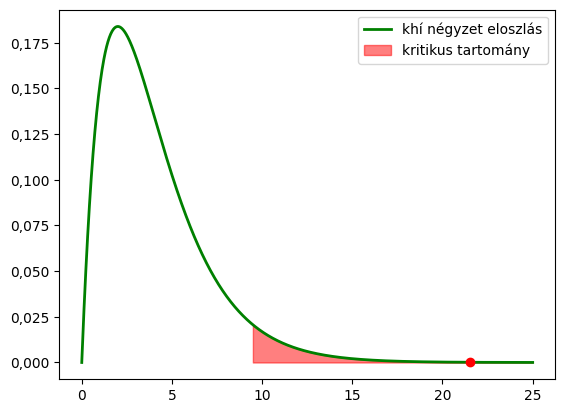

In [15]:
fig, ax = plt.subplots(1, 1)

distribution = chi2(df=chi_distribution_param)

x = np.linspace(0, 25, 1000)
x2 = np.linspace(critical_start, 25, 1000)
ax.plot(x, chi2.pdf(x, df=chi_distribution_param), 'g', lw=2, label='khí négyzet eloszlás')
ax.plot(test_statistic_result, distribution.pdf(test_statistic_result), 'ro')
ax.fill_between(x2, y1=0, y2=chi2.pdf(x2, df=chi_distribution_param), color='r', alpha=0.5, label='kritikus tartomány')
ax.legend()

In [12]:
if (test_statistic_result < critical_start):
    display('Mivel a próbastatisztika értéke az konfidenciaintervallumba esik ezért elfogadjuk a nullhipotézist.')
else:
    display('Mivel a próbastatisztika értéke a kritikus tartományba esik a nullhipotézist elutasítjuk.')

'Mivel a próbastatisztika értéke a kritikus tartományba esik a nullhipotézist elutasítjuk.'

## Scipy ellenőrzés

In [13]:
from scipy.stats import chisquare

result = chisquare(f_obs=amount_of_scrap_frequencies, f_exp=theoretical_frequencies)
result

Power_divergenceResult(statistic=21.527572016460912, pvalue=0.00024882513479753586)

In [14]:
result.pvalue > alpha

False

Ha `False` elutasítjuk.